# Images from events with different NSB levels

Images created from events from the prod `20240918_v0.10.12_allsky_nsb_tuning` where NSB is added at waveform level

In [93]:
from pathlib import Path
import ctapipe
import lstchain
print(f"ctapipe version {ctapipe.__version__}")
print(f"lstchain version {lstchain.__version__}")

import numpy as np
import matplotlib.pyplot as plt
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import SubarrayDescription
from ctapipe.io import read_table
from lstchain.io.io import dl1_images_lstcam_key, dl1_params_lstcam_key

ctapipe version 0.19.3
lstchain version 0.10.4


In [39]:
dl1_files = list(Path('/fefs/aswg/data/mc/DL1/AllSky/').glob('20240918_v0.10.12_allsky_nsb_tuning_*/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_102.199_run1.h5'))
dl1_files.sort()
dl1_files

[PosixPath('/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_0.00/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_102.199_run1.h5'),
 PosixPath('/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_0.07/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_102.199_run1.h5'),
 PosixPath('/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_0.14/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_102.199_run1.h5'),
 PosixPath('/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_0.22/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_102.199_run1.h5'),
 PosixPath('/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_0.38/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_102.199_run1.h5'),
 PosixPath('/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_0.

In [16]:
for df in dl1_files:
    print(df)
    

/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_1.76/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_102.199_run1.h5
/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_0.38/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_102.199_run1.h5
/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_0.81/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_102.199_run1.h5
/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_0.07/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_102.199_run1.h5
/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_0.14/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_102.199_run1.h5
/fefs/aswg/data/mc/DL1/AllSky/20240918_v0.10.12_allsky_nsb_tuning_0.22/TestingDataset/Gamma/node_theta_10.0_az_102.199_/dl1_simtel_corsika_theta_10.0_az_10

In [20]:
subarray = SubarrayDescription.from_hdf(dl1_files[0])
geom = subarray.tels[1].camera.geometry

In [86]:
dl1f = dl1_files[0]
image_table = read_table(dl1f, path=dl1_images_lstcam_key)
params_table = read_table(dl1f, path=dl1_params_lstcam_key)

In [89]:
good_event_idx = ((params_table['leakage_intensity_width_2'] == 0) & (params_table['intensity'] > 200) & (params_table['intensity'] < 220)).argmax()
good_event_idx

104

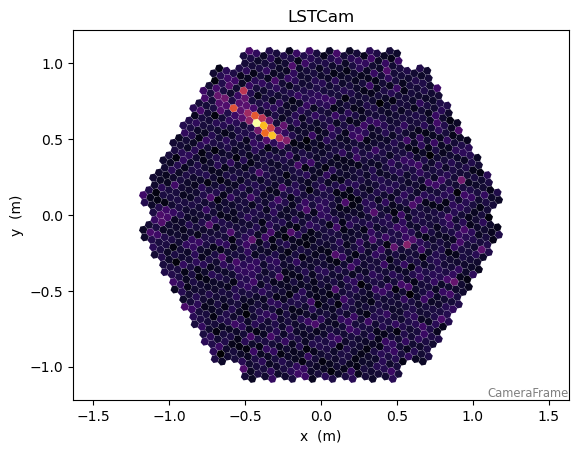

In [90]:
CameraDisplay(geom, image_table['image'][good_event_idx])

In [98]:
def find_nsb_ratio_from_filename(filename):
    import re

    match = re.search(r'nsb_tuning_([\d.]+)', filename)
    if match:
        nsb_level = match.group(1)
        return nsb_level
    else:
        raise ValueError(f"Can't find nsb tuning ratio in {filename}")


'2.34'

In [101]:
images = {}
for ii, dl1f in enumerate(dl1_files):
    nsb_ratio = find_nsb_ratio_from_filename(dl1f.as_posix())
    image_table = read_table(dl1f, path=dl1_images_lstcam_key)
    images[nsb_ratio] = image_table['image'][good_event_idx]

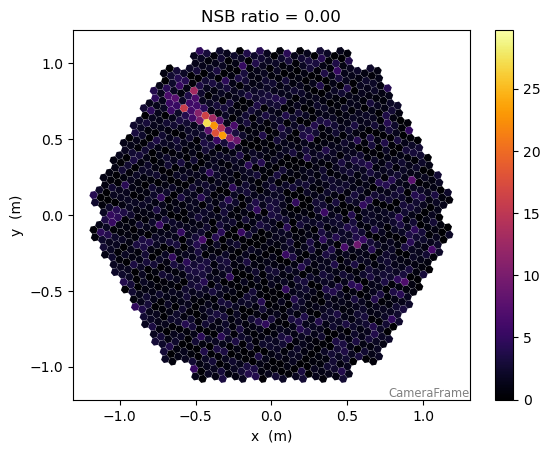

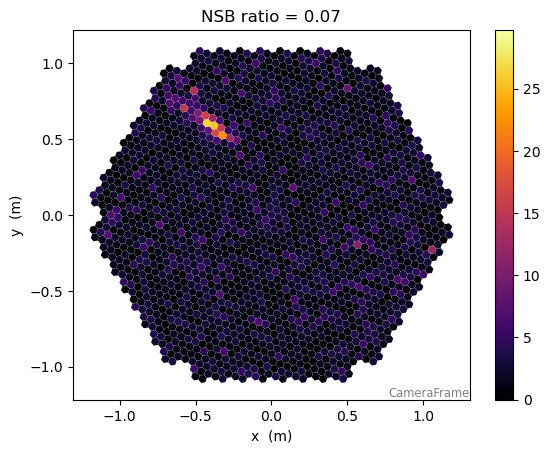

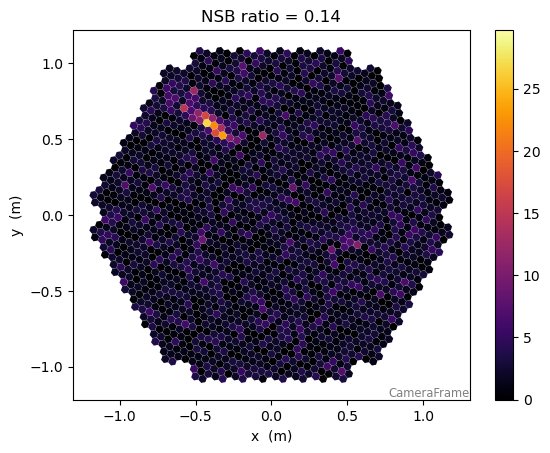

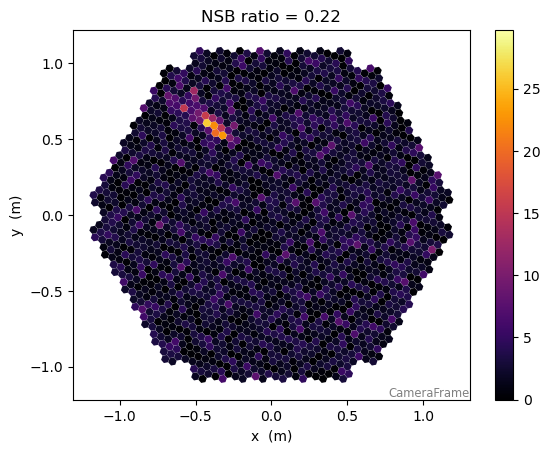

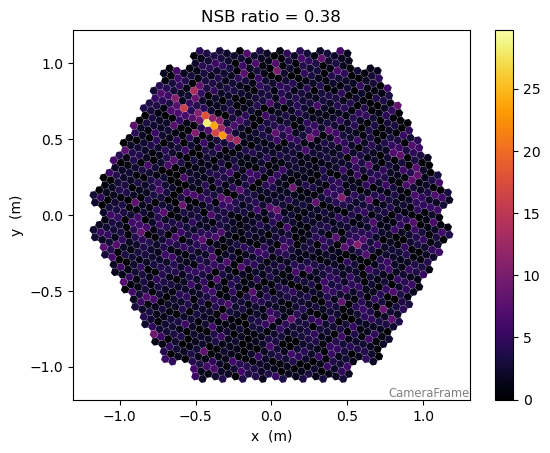

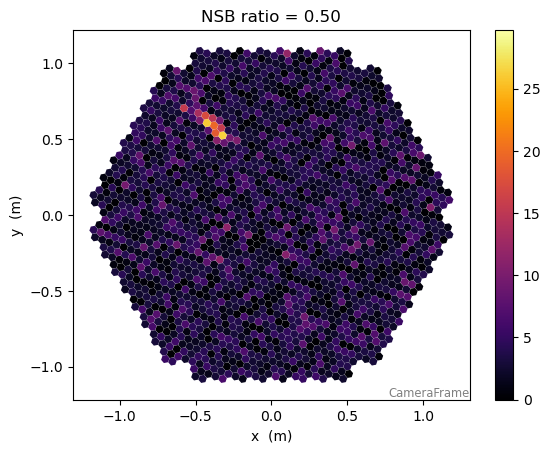

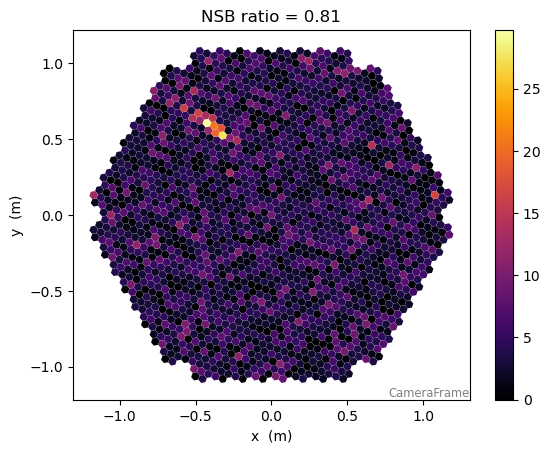

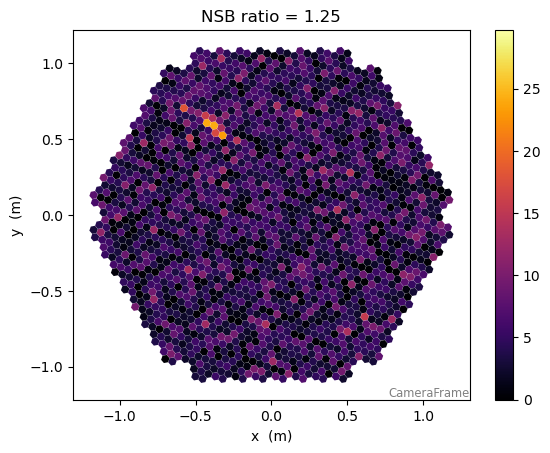

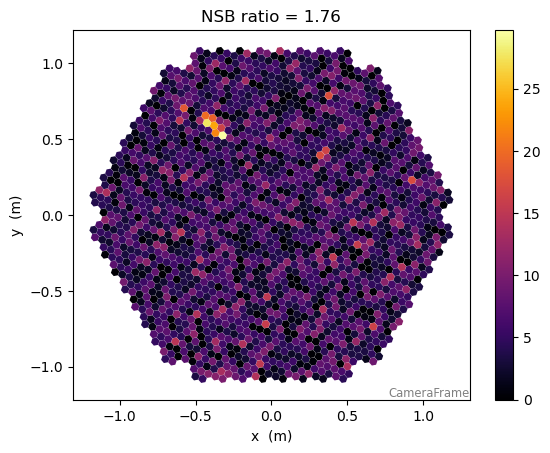

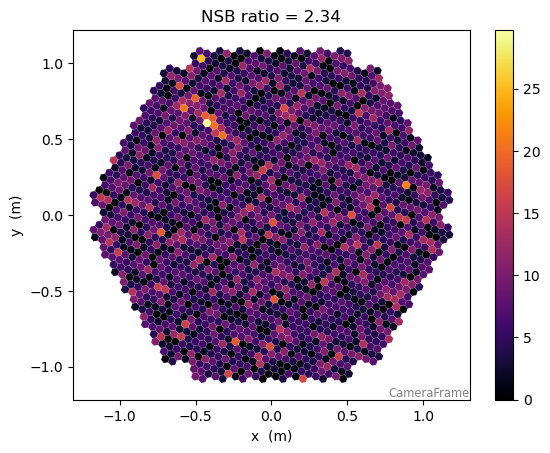

In [113]:
outdir = Path('images_nsb')
outdir.mkdir(exist_ok=True)

for nsb, image in images.items():
    display = CameraDisplay(geom, image)
    display.set_limits_minmax(0, image_table['image'][good_event_idx].max())
    display.add_colorbar()
    display.axes.set_title(f'NSB ratio = {nsb}')
    plt.savefig(outdir / f'event_{good_event_idx}_nsb_{nsb}.png')
    plt.show()